In [1]:
import os
import datetime
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm

# 1. Przygotowanie danych z czujnika

In [2]:
recording_list_files = os.listdir('sensor')
print(recording_list_files)

['2023-06-06T210952_data.txt', '2023-06-06T211233_data.txt', '2023-06-06T211334_data.txt', '2023-06-06T215232_data.txt', '2023-06-06T215249_data.txt', '2023-06-06T215350_data.txt', '2023-06-06T215451_data.txt', '2023-06-06T215552_data.txt', '2023-06-06T215653_data.txt', '2023-06-06T215754_data.txt', '2023-06-06T215855_data.txt', '2023-06-06T215957_data.txt', '2023-06-06T220058_data.txt', '2023-06-06T220159_data.txt', '2023-06-06T220300_data.txt', '2023-06-06T220401_data.txt', '2023-06-06T220518_data.txt', '2023-06-06T220619_data.txt', '2023-06-06T220720_data.txt', '2023-06-06T220821_data.txt', '2023-06-06T220922_data.txt', '2023-06-06T221023_data.txt', '2023-06-06T221124_data.txt', '2023-06-06T221226_data.txt', '2023-06-06T221327_data.txt', '2023-06-06T221428_data.txt', '2023-06-06T221529_data.txt', '2023-06-06T221630_data.txt', '2023-06-06T221731_data.txt', '2023-06-06T221832_data.txt', '2023-06-06T221933_data.txt', '2023-06-06T222034_data.txt', '2023-06-06T222135_data.txt', '2023-06-

In [3]:
recordings = []
for filename in recording_list_files:
    file_dir = os.path.join('sensor', filename)
    file = open(file_dir, 'r').read()
    file_split = file.split('\n')[:-1]
    for x in file_split:
        e = x.split(';')
        e[0] = float(e[0])
        e[1] = int(e[1])
        e[2] = int(e[2])
        # e[0] = datetime.datetime.fromtimestamp(e[0])
        recordings.append(e)

print(recordings[0:20])
print(len(recordings))

[[1686085258.198788, 492381, 3], [1686085258.248448, 492431, 3], [1686085258.298442, 492481, 3], [1686085258.348444, 492531, 3], [1686085258.398446, 492581, 3], [1686085258.44844, 492631, 3], [1686085258.498446, 492681, 3], [1686085258.54844, 492731, 3], [1686085258.598442, 492781, 3], [1686085258.648444, 492831, 3], [1686085258.698442, 492881, 3], [1686085258.748444, 492931, 3], [1686085258.798442, 492981, 3], [1686085258.848444, 493031, 3], [1686085258.898442, 493081, 3], [1686085258.948444, 493131, 3], [1686085258.998442, 493181, 3], [1686085259.048444, 493231, 3], [1686085259.098443, 493281, 3], [1686085259.148442, 493331, 3]]
68447


## 1.2 Odstępy czasowe pomiędzy próbkami

Dzięki temu możliwe jest odzielenie ich do 3 poszczególnych nagrań video

Id of new recordings: 3601
Id of new recordings: 28822
Id of new recordings: 55238


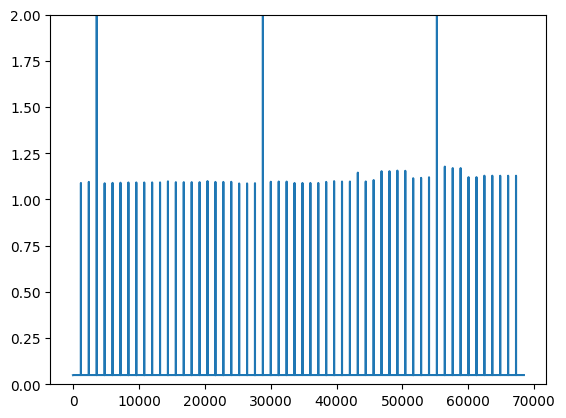

In [4]:
rs = []
recordings_new_id = []
for a in range(len(recordings) - 1):
    x = recordings[a]
    y = recordings[a + 1]
    r = y[0] - x[0]
    # print(r)
    rs.append(r)

    if r > 2:
        print(f'Id of new recordings: {a}')
        recordings_new_id.append(a)

plt.plot(rs)
ax = plt.gca()
ax.set_ylim([0, 2])
plt.show()

## 1.3 Odstępy pomiędzy podzielonymi próbkami
Podczas tworzenia nowego pliku można zauważyć duży odstęp

[3601, 28822, 55238]


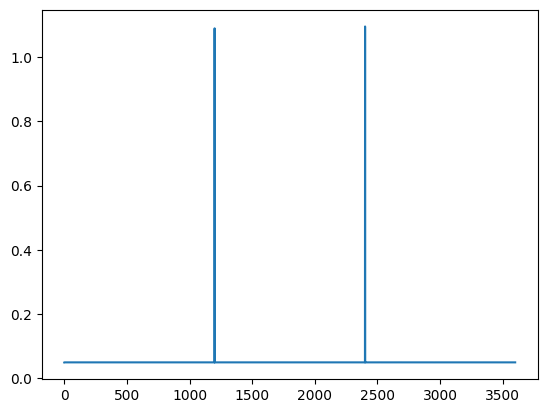

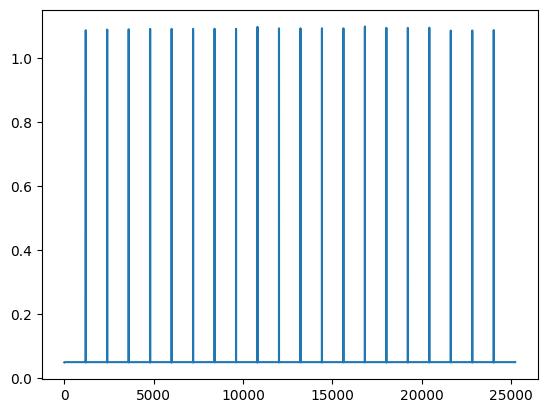

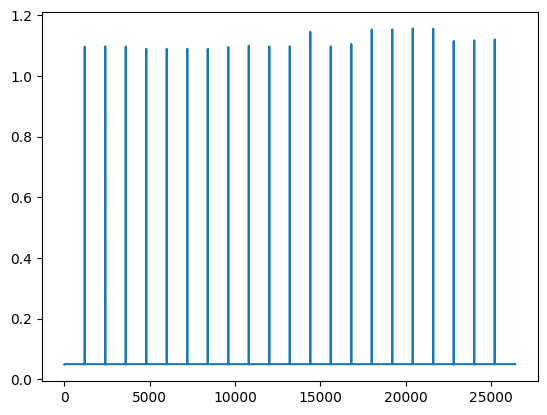

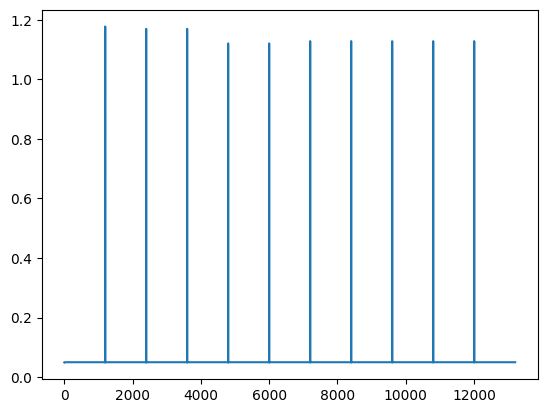

In [5]:
print(recordings_new_id)
recordings_divided = [
    recordings[:recordings_new_id[0]],
    recordings[recordings_new_id[0] + 1: recordings_new_id[1]],
    recordings[recordings_new_id[1] + 1: recordings_new_id[2]],
    recordings[recordings_new_id[2] + 1:]
]

for recording_divided in recordings_divided:
    rs = []
    for a in range(len(recording_divided) - 1):
        x = recording_divided[a]
        y = recording_divided[a + 1]
        r = y[0] - x[0]
        rs.append(r)
    plt.plot(rs)
    plt.show()



## 1.4 Dodanie czasu względnego zamiast bezwzględnego

Dodatkowo zmiena jednostki do czasu fps w video

In [6]:
def round_to_multiple(number, multiple):
    return round(multiple * round(number / multiple), 2)


separation = 1 / 1000

In [7]:
recordings_relative_divided = []
for recordings in recordings_divided:
    relative_times = set()  #Czasy nie powinny się powtarzać
    recordings_relative = []
    for i in range(len(recordings)):
        if i == 0:
            recordings_relative.append([0, recordings[i][1], recordings[i][2]])
            continue
        x = recordings[0]
        y = recordings[i]
        relative_time = y[0] - x[0]
        relative_time = round_to_multiple(relative_time, separation)
        # Jak czas się powtarza to jest pomijany
        if relative_time in relative_times:
            continue

        relative_times.add(relative_time)
        recordings_relative.append([relative_time, recordings[i][1], recordings[i][2]])
    recordings_relative_divided.append(recordings_relative)
print(recordings_relative_divided[0][:100])

[[0, 492381, 3], [0.05, 492431, 3], [0.1, 492481, 3], [0.15, 492531, 3], [0.2, 492581, 3], [0.25, 492631, 3], [0.3, 492681, 3], [0.35, 492731, 3], [0.4, 492781, 3], [0.45, 492831, 3], [0.5, 492881, 3], [0.55, 492931, 3], [0.6, 492981, 3], [0.65, 493031, 3], [0.7, 493081, 3], [0.75, 493131, 3], [0.8, 493181, 3], [0.85, 493231, 3], [0.9, 493281, 3], [0.95, 493331, 3], [1.0, 493381, 3], [1.05, 493431, 3], [1.1, 493481, 3], [1.15, 493531, 3], [1.2, 493581, 3], [1.25, 493631, 3], [1.3, 493681, 3], [1.35, 493731, 3], [1.4, 493781, 3], [1.45, 493831, 3], [1.5, 493881, 3], [1.55, 493931, 3], [1.6, 493981, 3], [1.65, 494031, 3], [1.7, 494081, 3], [1.75, 494131, 3], [1.8, 494181, 3], [1.85, 494231, 3], [1.9, 494281, 3], [1.95, 494331, 3], [2.0, 494381, 3], [2.05, 494431, 3], [2.1, 494481, 3], [2.15, 494531, 3], [2.2, 494581, 3], [2.25, 494631, 3], [2.3, 494681, 3], [2.35, 494731, 3], [2.4, 494781, 3], [2.45, 494831, 3], [2.5, 494881, 3], [2.55, 494931, 3], [2.6, 494981, 3], [2.65, 495031, 3], [2

# 2. Nagrania video

In [8]:
video_list_files = os.listdir('videos')
print(video_list_files)

['GOPR1082.MP4', 'GOPR1085.MP4', 'GOPR1087.MP4', 'GOPR1088.MP4']


## 2.1 Zbadanie średniej jasności pikseli

In [9]:
frames_light_times = []
print('start')
for video_name in video_list_files:
    video_path = os.path.join('videos', video_name)
    cap = cv2.VideoCapture(video_path)
    frames_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    fps = cap.get(cv2.CAP_PROP_FPS)
    video_time = frames_count / fps
    frames_light_time = []

    if (cap.isOpened() == False):
        print("Error opening video stream or file")

    # pbar = tqdm(total=frames_count)
    succ = fail = 0
    while (cap.isOpened()):
        ret, frame = cap.read()
        if ret == False:
            fail += 1
            continue
        else:
            succ += 1
        if succ == frames_count:
            break

        # cv2.imshow('Frame',frame)
        frame_light = round(np.average(frame) / 256, 2)
        frame_time = round(succ / fps, 2)
        frames_light_time.append([frame_light, frame_time])

        # pbar.update(1)
        if (succ + fail) % 500 == 0:
            print(succ + fail, '/', frames_count)
        # if cv2.waitKey(25) & 0xFF == ord('q'):
        #     break

    # print(succ, fail)
    cap.release()
    cv2.destroyAllWindows()
    frames_light_times.append(frames_light_time)

start
500 / 17250.0
1000 / 17250.0
1500 / 17250.0
2000 / 17250.0
2500 / 17250.0
3000 / 17250.0
3500 / 17250.0
4000 / 17250.0
4500 / 17250.0
5000 / 17250.0
5500 / 17250.0
6000 / 17250.0
6500 / 17250.0
7000 / 17250.0
7500 / 17250.0
8000 / 17250.0
8500 / 17250.0
9000 / 17250.0
9500 / 17250.0
10000 / 17250.0
10500 / 17250.0
11000 / 17250.0
11500 / 17250.0
12000 / 17250.0
12500 / 17250.0
13000 / 17250.0
13500 / 17250.0
14000 / 17250.0
14500 / 17250.0
15000 / 17250.0
15500 / 17250.0
16000 / 17250.0
16500 / 17250.0
17000 / 17250.0
500 / 33585.0
1000 / 33585.0
1500 / 33585.0
2000 / 33585.0
2500 / 33585.0
3000 / 33585.0
3500 / 33585.0
4000 / 33585.0
4500 / 33585.0
5000 / 33585.0
5500 / 33585.0
6000 / 33585.0
6500 / 33585.0
7000 / 33585.0
7500 / 33585.0
8000 / 33585.0
8500 / 33585.0
9000 / 33585.0
9500 / 33585.0
10000 / 33585.0
10500 / 33585.0
11000 / 33585.0
11500 / 33585.0
12000 / 33585.0
12500 / 33585.0
13000 / 33585.0
13500 / 33585.0
14000 / 33585.0
14500 / 33585.0
15000 / 33585.0
15500 / 33

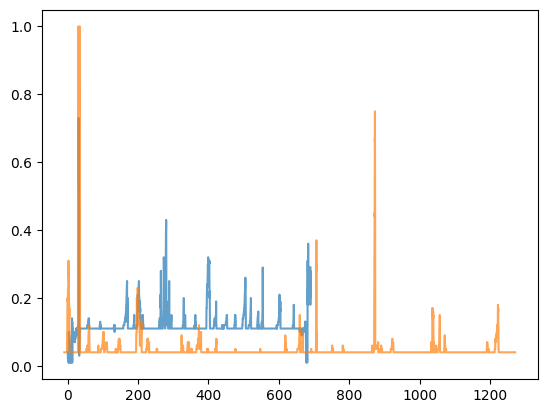

In [10]:
light_y = [x[0] for x in frames_light_times[0]]
light_x = [x[1] for x in frames_light_times[0]]

recordings_moved = [[x[0] - 10, x[1], x[2]] for x in recordings_relative_divided[1]]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]

plt.plot(light_x, light_y, alpha=.7)
plt.plot(record_x, record_y, alpha=.7)
plt.show()

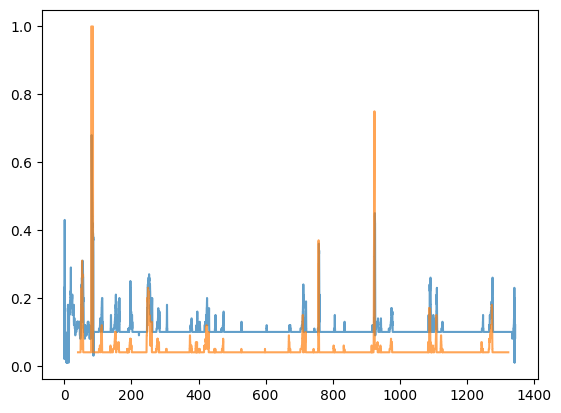

In [11]:
light_y = [x[0] for x in frames_light_times[1]]
light_x = [x[1] for x in frames_light_times[1]]

recordings_moved = [[x[0] + 41, x[1], x[2]] for x in recordings_relative_divided[1]]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]

plt.plot(light_x, light_y, alpha=.7)
plt.plot(record_x, record_y, alpha=.7)
plt.show()

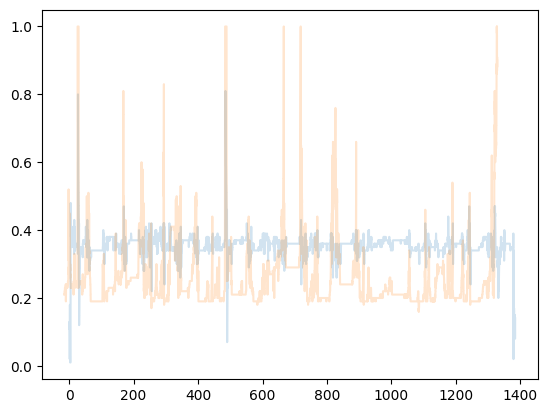

In [12]:
light_y = [x[0] for x in frames_light_times[2]]
light_x = [x[1] for x in frames_light_times[2]]

recordings_moved = [[x[0] - 15, x[1], x[2]] for x in recordings_relative_divided[2]]
ys = record_y = [x[2] for x in recordings_moved]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]

plt.plot(light_x, light_y, alpha=.2)
plt.plot(record_x, record_y, alpha=.2)
plt.show()

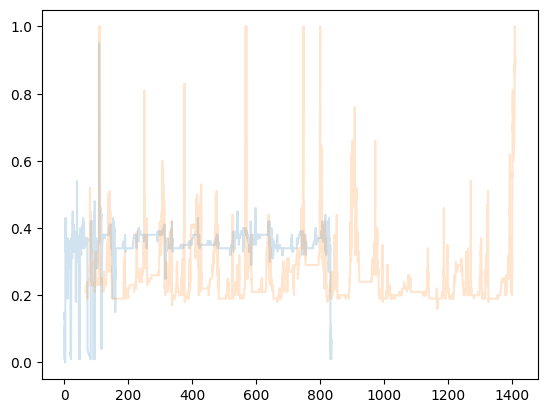

In [13]:
light_y = [x[0] for x in frames_light_times[3]]
light_x = [x[1] for x in frames_light_times[3]]

recordings_moved = [[x[0] + 67, x[1], x[2]] for x in recordings_relative_divided[2]]
ys = record_y = [x[2] for x in recordings_moved]
record_y = [x[2] / 100 if x[2] < 100 else 1 for x in recordings_moved]
record_x = [x[0] for x in recordings_moved]

plt.plot(light_x, light_y, alpha=.2)
plt.plot(record_x, record_y, alpha=.2)
plt.show()

## 2.2 Przesunięcie recordings o daną wartość

In [14]:
move_recording_values = [-10, -41, -15, 67]

In [15]:
recordings_moved_all = []
outlier_value = 100
for recordings, move_value in zip(recordings_relative_divided, move_recording_values):
    recordings_moved = []
    for x in recordings:
        new_x2 = x[2] / outlier_value if x[2] < outlier_value else 1
        new_x0 = x[0] + move_value
        recordings_moved.append([new_x0, x[1], new_x2])

    recordings_moved_all.append(recordings_moved)

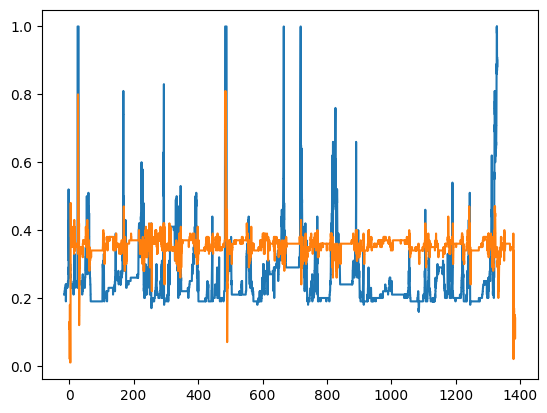

In [16]:
n = 2
light_y = [x[0] for x in frames_light_times[n]]
light_x = [x[1] for x in frames_light_times[n]]

record_y = [x[2] for x in recordings_moved_all[n]]
record_x = [x[0] for x in recordings_moved_all[n]]

plt.plot(record_x, record_y)
plt.plot(light_x, light_y)
plt.show()

## 2.3 Obcięcie nagrań (do tej samej długości)

In [17]:
data = []
for i in range(len(recordings_moved_all)):
    d = []
    for r in tqdm(recordings_moved_all[i]):
        for frame_id, f in enumerate(frames_light_times[i]):
            if r[0] == f[1]:
                # d.append([frame_id, r[0], r[2], f[0]])
                d.append([frame_id, r[2], ])
                continue
    data.append(d)

print(data[0][:10])


100%|██████████| 13208/13208 [00:20<00:00, 632.14it/s]

[[24, 0.03], [49, 0.03], [74, 0.03], [99, 0.03], [109, 0.03], [114, 0.03], [124, 0.03], [134, 0.03], [139, 0.03], [149, 0.03]]


In [18]:
for x in data[0][500:600]:
    print(x)
print(len(data[0]))

[2996, 0.03]
[3006, 0.03]
[3016, 0.03]
[3021, 0.03]
[3031, 0.03]
[3041, 0.03]
[3046, 0.03]
[3056, 0.03]
[3066, 0.03]
[3071, 0.03]
[3081, 0.03]
[3091, 0.03]
[3096, 0.03]
[3106, 0.03]
[3116, 0.03]
[3121, 0.03]
[3131, 0.03]
[3141, 0.03]
[3146, 0.03]
[3156, 0.03]
[3166, 0.03]
[3171, 0.03]
[3181, 0.03]
[3191, 0.03]
[3196, 0.03]
[3201, 0.03]
[3206, 0.03]
[3211, 0.03]
[3216, 0.03]
[3221, 0.03]
[3226, 0.03]
[3231, 0.03]
[3236, 0.03]
[3241, 0.03]
[3246, 0.03]
[3251, 0.03]
[3256, 0.03]
[3261, 0.03]
[3266, 0.03]
[3271, 0.03]
[3276, 0.03]
[3281, 0.03]
[3286, 0.03]
[3291, 0.03]
[3296, 0.03]
[3301, 0.03]
[3306, 0.03]
[3311, 0.03]
[3316, 0.03]
[3321, 0.03]
[3326, 0.03]
[3331, 0.03]
[3336, 0.03]
[3341, 0.03]
[3346, 0.03]
[3351, 0.03]
[3356, 0.03]
[3361, 0.03]
[3366, 0.03]
[3371, 0.03]
[3376, 0.03]
[3381, 0.03]
[3386, 0.03]
[3391, 0.03]
[3396, 0.03]
[3401, 0.03]
[3406, 0.03]
[3411, 0.03]
[3416, 0.03]
[3421, 0.03]
[3426, 0.03]
[3431, 0.03]
[3436, 0.03]
[3441, 0.03]
[3446, 0.03]
[3451, 0.03]
[3456, 0.03]

# 3. Normalizacja

## 3.1 Połączenie w jedną tablicę

In [23]:
data_raw = []
for video_id, batch in enumerate(data):
    for frame_id,x in enumerate(batch):
        value = x[1]
        data_raw.append([f"{video_id}_{frame_id}", value])

In [26]:
import csv

with open('data_newx.csv', newline='') as csvfile:
    data_newx = list(csv.reader(csvfile))

print(data_newx[:10])


[['0_416', '0', '416', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_417', '0', '417', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_418', '0', '418', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_419', '0', '419', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_420', '0', '420', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_421', '0', '421', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_422', '0', '422', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_423', '0', '423', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_424', '0', '424', '-0.32626265124330317', '0.0', 'False', 'False'], ['0_426', '0', '426', '-0.32626265124330317', '0.0', 'False', 'False']]


In [28]:
data_newx_dict = dict()
for x in data_newx:
    vid = x[0]
    ground_truth = x[6]
    data_newx_dict[vid] = ground_truth == 'True'

In [31]:
data_raw2 = []

for vid, value in data_raw:
    if vid in data_newx_dict:
        data_raw2.append([value, data_newx_dict[vid]])

[[0.03, False], [0.03, False], [0.03, False], [0.03, False], [0.03, False], [0.03, False], [0.03, False], [0.03, False], [0.03, False], [0.03, False]]


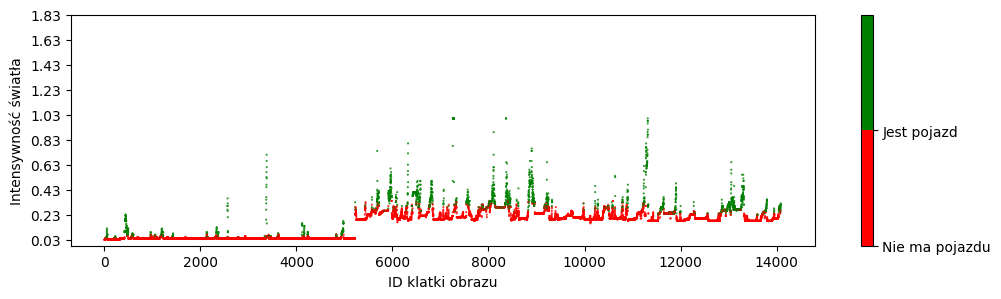

In [47]:
from matplotlib import ticker
import matplotlib.pyplot as plt
import matplotlib


x = range(len(data_raw2))
y = [x[0] for x in data_raw2]
label = [x[1] for x in data_raw2]
colors = ['red','green']

fig = plt.figure(figsize=(12,3))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors), s=0.2)

cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))

cb.set_ticks(loc)
cb.set_ticklabels(['Nie ma pojazdu', 'Jest pojazd'])

plt.xlabel("ID klatki obrazu")
plt.ylabel("Intensywność światła")
plt.xticks(np.arange(min(x), max(x)+1, 2000.0))
plt.yticks(np.arange(min(y), max(y)+1, .2))
# plt.title('Analiza intensywości światła z czujnika')
plt.show()

In [19]:
data_normalized_z_score = []

for video_id, batch in enumerate(data):
    values = [x[1] for x in batch]
    std_y = np.std(values)
    mean = np.mean(values)

    for frame_id, v in enumerate(batch):
        value = v[1]
        new_value = (value - mean) / std_y
        data_normalized_z_score.append([f"{video_id}_{frame_id}", new_value])

print(data_normalized_z_score[:10])

[['0_0', -0.32626265124330317], ['0_1', -0.32626265124330317], ['0_2', -0.32626265124330317], ['0_3', -0.32626265124330317], ['0_4', -0.32626265124330317], ['0_5', -0.32626265124330317], ['0_6', -0.32626265124330317], ['0_7', -0.32626265124330317], ['0_8', -0.32626265124330317], ['0_9', -0.32626265124330317]]


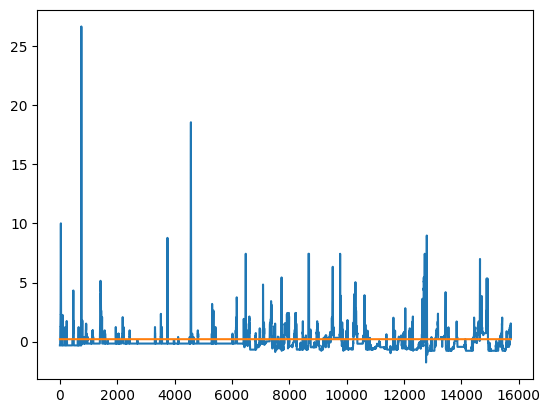

In [20]:
import matplotlib.pyplot as plt

x = [x[1] for x in data_normalized_z_score]
xline = [0.2 for _ in data_normalized_z_score]

plt.plot(x)
plt.plot(xline)
plt.show()

In [21]:
data_normalized_min_max = []

for video_id, batch in enumerate(data):
    values = [x[1] for x in batch]
    min_y = min(values)
    max_y = max(values)

    for frame_id, v in enumerate(batch):
        value = v[1]
        new_value = (value - min_y) / (max_y - min_y)
        data_normalized_min_max.append([f"{video_id}_{frame_id}", new_value])

print(data_normalized_min_max[:10])

[['0_0', 0.0], ['0_1', 0.0], ['0_2', 0.0], ['0_3', 0.0], ['0_4', 0.0], ['0_5', 0.0], ['0_6', 0.0], ['0_7', 0.0], ['0_8', 0.0], ['0_9', 0.0]]


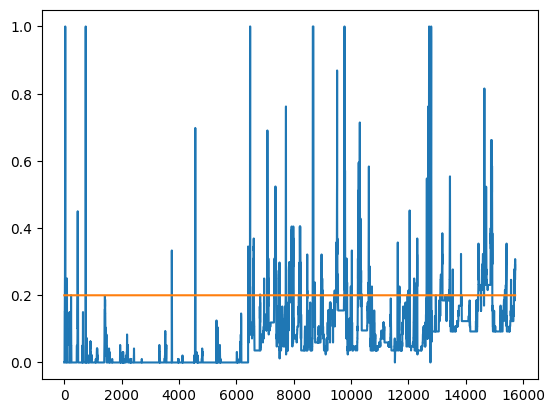

In [22]:
x = [x[1] for x in data_normalized_min_max]
xline = [0.2 for _ in data_normalized_min_max]

plt.plot(x)
plt.plot(xline)
plt.show()

# 4. Zapisanie danych

In [23]:
import csv

f = open(f"z_score.csv", 'w', newline='', encoding='utf-8')
writer = csv.writer(f)
writer.writerows(data_normalized_z_score)
f.close()

In [24]:
f = open(f"min_max.csv", 'w', newline='', encoding='utf-8')
writer = csv.writer(f)
writer.writerows(data_normalized_min_max)
f.close()